In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

TimeoutException: Requesting secret KAGGLE_USERNAME timed out. Secrets can only be fetched when running from the Colab UI.

In [ ]:
!kaggle datasets download -d rasooljader/gestational-diabetes

Dataset URL: https://www.kaggle.com/datasets/rasooljader/gestational-diabetes
License(s): CC-BY-SA-4.0
  0% 0.00/6.30k [00:00<?, ?B/s]
100% 6.30k/6.30k [00:00<00:00, 14.9MB/s]


In [ ]:
!unzip /content/gestational-diabetes.zip

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Gestational Diabetes.csv',header=None)
# df = pd.read_csv('/content/kddcup.data',header=None)
df.fillna(0, inplace=True)
df.columns = df.iloc[0]
df = df.iloc[1:,:]

In [ ]:
df

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
1,17.00,1.0,48.0,165.0,17.6,0,0
2,17.00,1.0,49.0,145.0,23.3,0,0
3,17.00,1.0,50.0,140.0,25.5,0,0
4,17.00,1.0,50.0,145.0,23.8,0,0
5,17.00,1.0,49.0,146.0,23.0,0,0
...,...,...,...,...,...,...,...
1008,35.00,3.0,89.0,159.0,35.2,1,1
1009,41.00,4.0,87.0,165.0,32.0,0,0
1010,34.00,2.0,67.0,160.0,26.2,1,0
1011,33.00,3.0,65.0,167.0,23.3,0,1


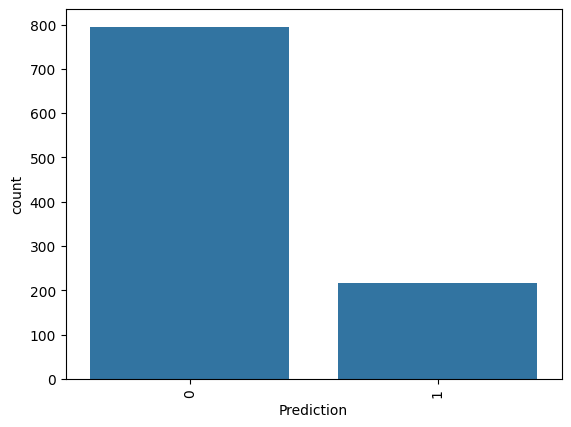

In [ ]:
# prompt: give me barplot for the disribusion of the classes

import matplotlib.pyplot as plt
import seaborn as sns
# Create a countplot of the target variable
sns.countplot(x=df["Prediction"])
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Display the plot
plt.show()


In [ ]:

classes = df[df.columns[-1]].unique()
classes

array(['0', '1'], dtype=object)

In [ ]:
#@title Normalize
df = df.astype(np.float64)
df.values[np.isnan(df.values)] = 0
df.iloc[:, 0:-1] = (df.iloc[:, 0:-1] - df.iloc[:, 0:-1].min()) / (df.iloc[:, 0:-1].max() - df.iloc[:, 0:-1].min())
df.values[np.isnan(df.values)] = 0
df


,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
1,0.034483,0.000,0.060241,0.491803,0.041775,0.0,0.0
2,0.034483,0.000,0.072289,0.163934,0.190601,0.0,0.0
3,0.034483,0.000,0.084337,0.081967,0.248042,0.0,0.0
4,0.034483,0.000,0.084337,0.163934,0.203655,0.0,0.0
5,0.034483,0.000,0.072289,0.180328,0.182768,0.0,0.0
...,...,...,...,...,...,...,...
1008,0.655172,0.250,0.554217,0.393443,0.501305,1.0,1.0
1009,0.862069,0.375,0.530120,0.491803,0.417755,0.0,0.0
1010,0.620690,0.125,0.289157,0.409836,0.266319,1.0,0.0
1011,0.586207,0.250,0.265060,0.524590,0.190601,0.0,1.0


In [ ]:
df = df.astype(np.float64)
df.values[np.isnan(df.values)] = 0

In [ ]:
df[np.isnan(df.values)] = 0
np.any(np.isnan(df))

False

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].astype(int).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 90)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
len(set(y_test))

2

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_train_resampled, y_train = ros.fit_resample(X_train_flat, y_train)

# Reshape images back to 3D after oversampling
X_train = X_train_resampled.reshape(-1, 6, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD

# model = Sequential()
# # model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(6, 1)))
# # model.add(MaxPooling1D(pool_size=2))
# # # model.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))
# # # model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(len(classes), activation='sigmoid'))

model = Sequential([
    Dense(128, activation='relu', input_shape=(6,)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='sigmoid')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=1000, batch_size=32)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6614 - loss: 0.6324 - val_accuracy: 0.8670 - val_loss: 0.4303
Epoch 2/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7562 - loss: 0.5163 - val_accuracy: 0.8571 - val_loss: 0.3877
Epoch 3/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7682 - loss: 0.4990 - val_accuracy: 0.8768 - val_loss: 0.3559
Epoch 4/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7663 - loss: 0.4924 - val_accuracy: 0.8768 - val_loss: 0.3428
Epoch 5/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7644 - loss: 0.4858 - val_accuracy: 0.8571 - val_loss: 0.3559
Epoch 6/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7860 - loss: 0.4572 - val_accuracy: 0.8128 - val_loss: 0.4288
Epoch 7/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7815 - loss: 0.4679 - val_accuracy: 0.8227 - val_loss: 0.3996
Epoch 8/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7974 - loss: 0.4668 - val_accuracy: 0.7882 - val_l

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# model.save('/content/drive/MyDrive/kddcup.h5')

In [ ]:
# !gdown 1Rfomj5dQfOng65AWKbr67l9Rbyfj6aGU

In [ ]:
# import tensorflow as tf
# model = tf.keras.models.load_model('/content/kddcup.h5')


In [ ]:
history

In [ ]:

loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

print("Loss:", loss)
print("Accuracy:", accuracy)


7/7 - 0s - 4ms/step - accuracy: 0.8571 - loss: 0.3451
Loss: 0.3451191484928131
Accuracy: 0.8571428656578064


In [ ]:


import numpy as np
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
correct_predictions = np.sum(y_pred == y_test)
accuracy = correct_predictions / len(y_test)
print("Manual Accuracy:", accuracy)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Manual Accuracy: 0.8571428571428571


In [ ]:
set(y_test)

{0, 1}

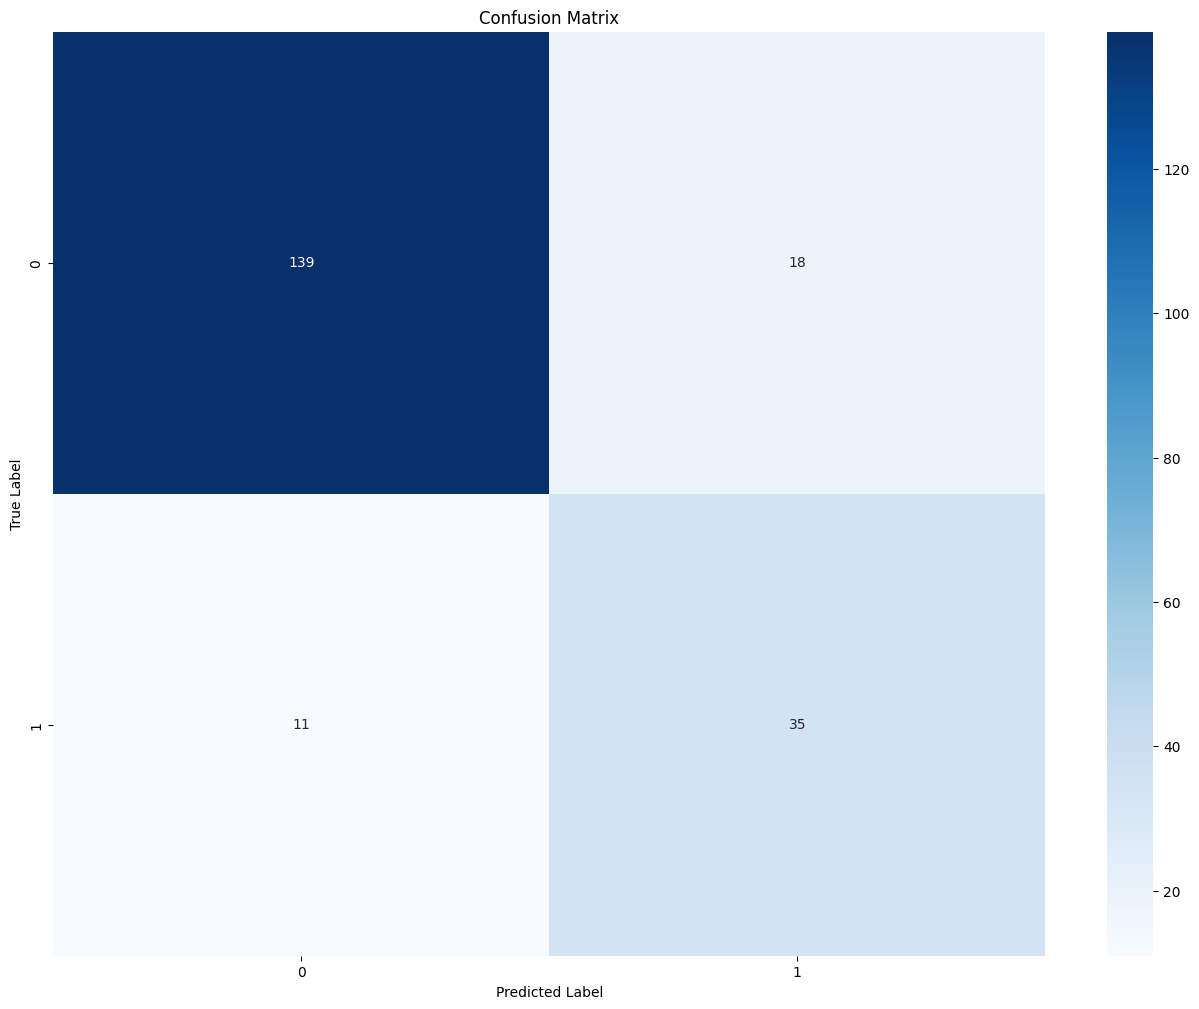

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

class_labels = classes

# Plot the confusion matrix
plt.figure(figsize=(16,12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Manual Accuracy: 0.7821316614420063


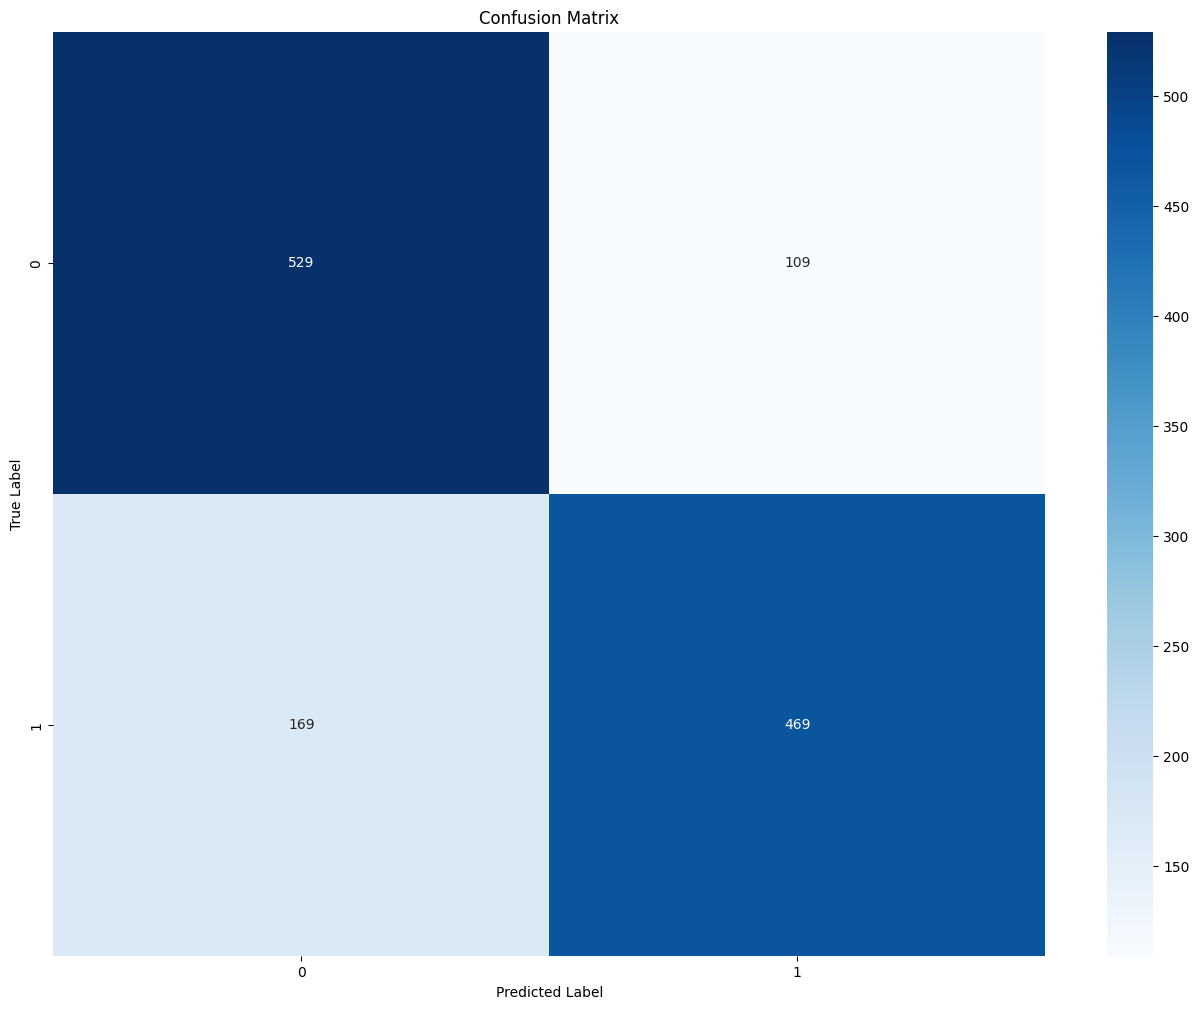

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



import numpy as np
y_pred1 = model.predict(X_train)
y_pred1 = np.argmax(y_pred1, axis=1)
correct_predictions = np.sum(y_pred1 == y_train)
accuracy = correct_predictions / len(y_train)
print("Manual Accuracy:", accuracy)


# Create the confusion matrix
cm = confusion_matrix(y_train, y_pred1)

class_labels = classes

# Plot the confusion matrix
plt.figure(figsize=(16,12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#@title Test Accuracy Precision Recall and F1 Score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred,average='weighted')
print('F1 score: %f' % f1)
pd.DataFrame({
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1 Score": [f1]
})

Accuracy: 0.857143
Precision: 0.866325
Recall: 0.857143
F1 score: 0.860565


,Accuracy,Precision,Recall,F1 Score
0,0.857143,0.866325,0.857143,0.860565


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       157
           1       0.66      0.76      0.71        46

    accuracy                           0.86       203
   macro avg       0.79      0.82      0.81       203
weighted avg       0.87      0.86      0.86       203



In [ ]:
history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy']

([1.3780632019042969,
  0.7070335745811462,
  0.6097791194915771,
  0.6116675734519958,
  0.6342810988426208,
  0.6151553988456726,
  0.7817356586456299,
  0.6476730704307556,
  0.6295260190963745,
  0.5146388411521912,
  0.6893354654312134,
  0.5628737211227417,
  0.5403357744216919,
  0.5781195163726807,
  0.5629435777664185,
  0.6011854410171509,
  0.5655014514923096,
  0.5452499389648438,
  0.5232322216033936,
  0.5234110355377197,
  0.5611470341682434,
  0.6195324063301086,
  0.5262383818626404,
  0.5329354405403137,
  0.5106837749481201,
  0.49881431460380554,
  0.4970088601112366,
  0.5077893733978271,
  0.5996670722961426,
  0.5563939213752747,
  0.515207052230835,
  0.5139511227607727,
  0.516741931438446,
  0.5313336253166199,
  0.5451724529266357,
  0.5259846448898315,
  0.5123967528343201,
  0.5734828114509583,
  0.6549370288848877,
  0.5400198698043823,
  0.5581762790679932,
  0.5556694269180298,
  0.5185359716415405,
  0.5568678379058838,
  0.5238998532295227,
  0.4880548

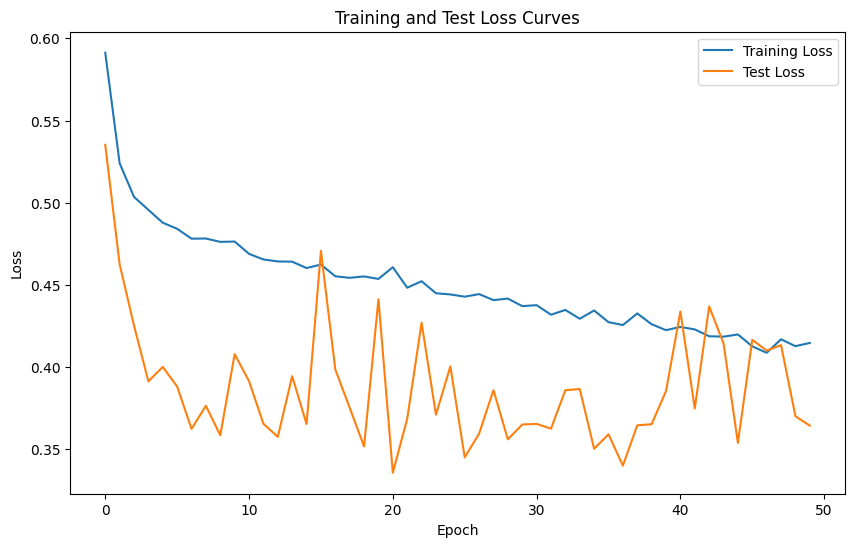

In [ ]:
#@title Plot the training and validation loss curves

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Test Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


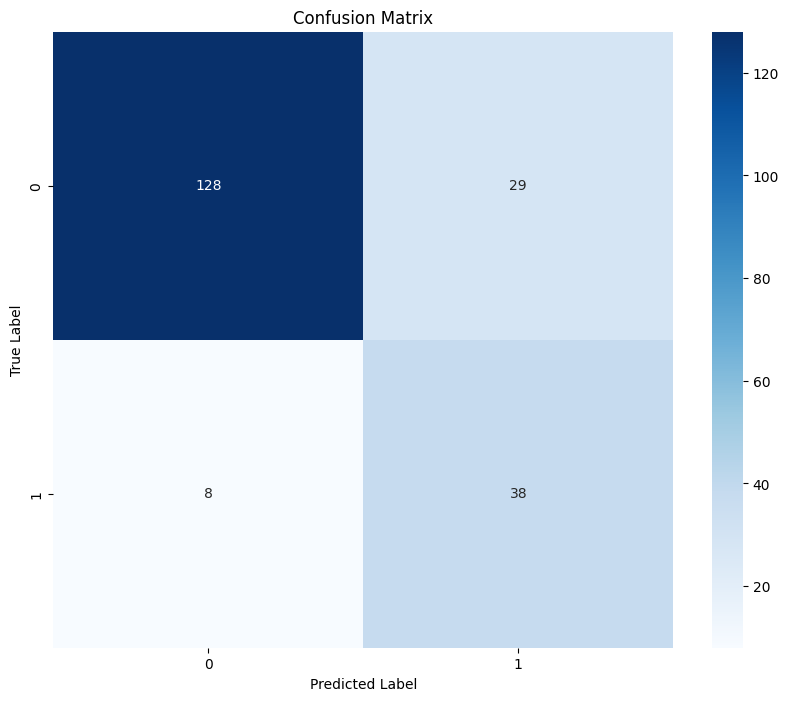

In [ ]:
# prompt: plot the confusion matrix

# Assuming 'y_test' and 'y_pred' are already defined as true and predicted labels respectively
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


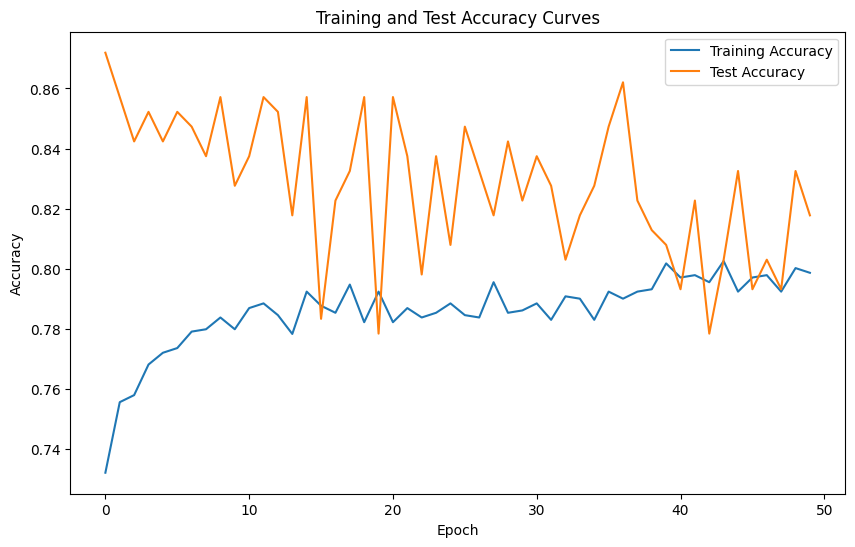

In [ ]:
#@title Plot the training and validation accuracy curves

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
FedLoss = [0.01235224883748878,
          0.006337142296706174,
          0.0006978165933681078,
          0.00045985745886961617,
          0.0003478994724142132,
          0.00027870764778483483,
          0.0003137399543146169,
          0.00023023601228035754,
          0.00037726190504203425,
          0.00019780901833350614,
          0.00020039243095286392]
FedACC = [8.281573498964803e-05,
          0.30256728778467906,
          0.9226501035196687,
          0.9568944099378882,
          0.9695238095238096,
          0.983312629399586,
          0.9797101449275363,
          0.9833954451345756,
          0.9657556935817805,
          0.9867494824016563,
          0.9873291925465838]

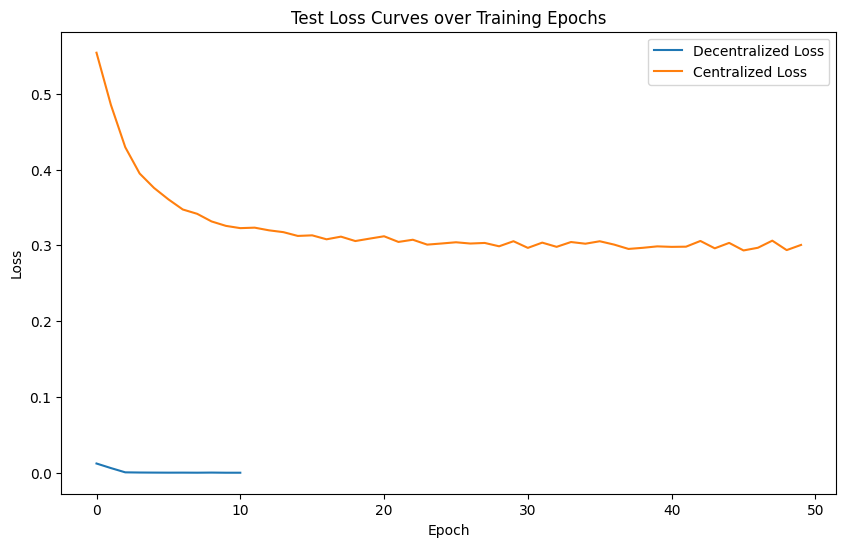

In [ ]:
#@title Plot the training and validation loss curves + njhg

plt.figure(figsize=(10, 6))
plt.plot(FedLoss, label='Decentralized Loss')
plt.plot(history.history['val_loss'], label='Centralized Loss')
plt.title('Test Loss Curves over Training Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


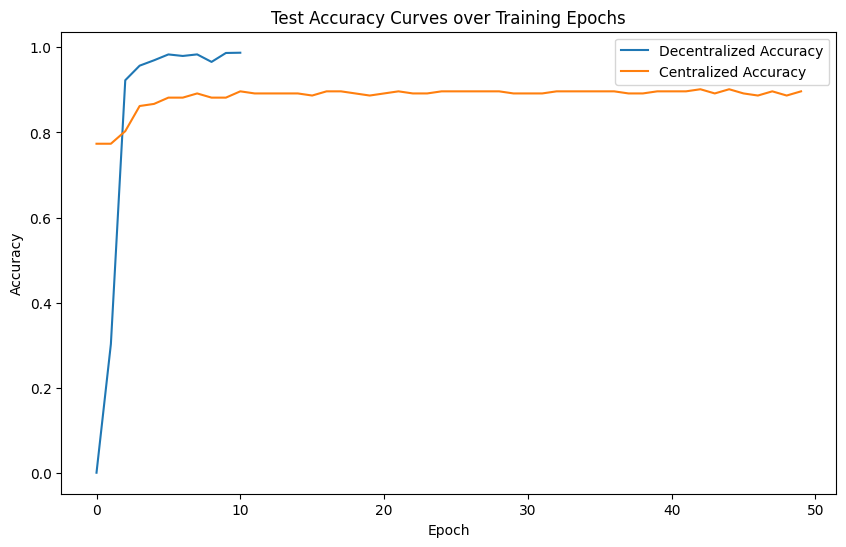

In [ ]:
#@title Plot the training and validation loss curves + njhg

plt.figure(figsize=(10, 6))
plt.plot(FedACC, label='Decentralized Accuracy')
plt.plot(history.history['val_accuracy'], label='Centralized Accuracy')
plt.title('Test Accuracy Curves over Training Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# prompt: calculate precision / f1score recall

from sklearn.metrics import precision_score, f1_score, recall_score

# Calculate precision, f1-score, and recall
precision = precision_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("F1-score:", f1_score)
print("Recall:", recall)


Precision: 0.8971337662001707
F1-score: 0.888833836742861
Recall: 0.896551724137931
